In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Titanic-Dataset.csv')


# Loading the dataset

In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


# Handling Null Values

In [ ]:
# Check for null values (1 line)
print('Pre-processing:')
print(df.isnull().sum()) #687 null_cabin, 177 null_age, 2 null_Embarked

# Fill null values for 'Embarked' with the mode(1 line)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
###df['Cabin'].fillna(df['Cabin'].mode()[0], inplace = True) #Note NaN is the mode here, We're replacing NaN w NaN(useless)

# Drop rows with null values in 'Cabin' (or alternatively, you can fill it with a placeholder) (1 line)
df.dropna(subset=['Cabin'], inplace=True)
print('===========================\nPost-processing:')
print(df_processed.isnull().sum()) #19 null_age


Pre-processing:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Post-processing:
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64


# Handling Duplicates

In [ ]:
# Check for duplicates (1 line)
df.duplicated().sum()
#df_processed[df_processed.duplicated()] This line to show duplicates

# Drop duplicates if any (1 line)
df = df_processed.drop_duplicates()



# Handling Outliers

<Axes: xlabel='Fare'>

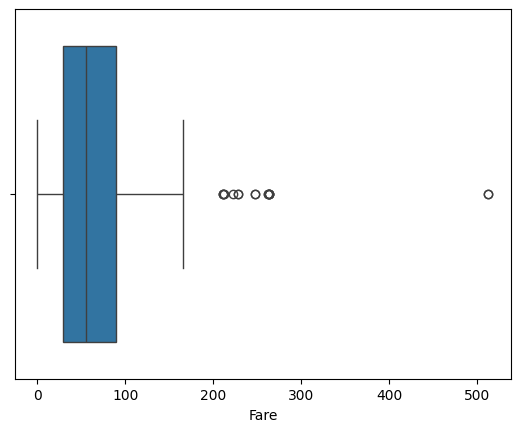

In [ ]:
import seaborn as sns #Before handling outliers
sns.boxplot(x = df['Fare'])

<Axes: xlabel='Fare'>

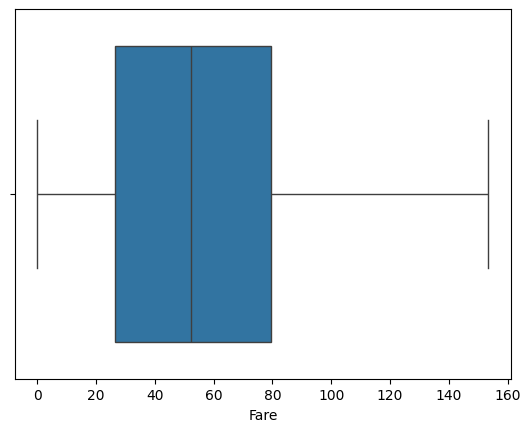

In [ ]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Fare' using the remove_outilers function (1 line)

df= remove_outliers(df, 'Fare')
# sns.boxplot(x = df['Fare']) #visualization


# Scaling and Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling for 'Fare' (2 lines)
scaler = StandardScaler()
df['Fare'] = scalar.fit_transform(df[['Fare']])

# Min-Max scaling for 'Age' (2 lines)
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.266566,1,0,A/5 21171,-1.320980,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.468892,1,0,PC 17599,0.370505,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.317147,0,0,STON/O2. 3101282,-1.303150,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.430956,1,0,113803,-0.109820,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,0.671219,0,0,17463,-0.142509,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,0.582701,1,1,11751,-0.124237,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,0.405665,0,0,695,-1.380416,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,0.696510,0,1,11767,0.684192,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.228629,0,0,112053,-0.720023,B42,S


# Encoding Categorical Variables

In [ ]:
# One-hot encoding for 'Embarked' and 'Sex' (1 line)
df = pd.get_dummies(df, columns=['Embarked', 'Sex'])
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",0.266566,1,0,A/5 21171,-1.320980,B96 B98,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.468892,1,0,PC 17599,0.370505,C85,True,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0.317147,0,0,STON/O2. 3101282,-1.303150,G6,False,False,True,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.430956,1,0,113803,-0.109820,C123,False,False,True,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",0.671219,0,0,17463,-0.142509,E46,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0.582701,1,1,11751,-0.124237,D35,False,False,True,True,False
872,873,0,1,"Carlsson, Mr. Frans Olof",0.405665,0,0,695,-1.380416,B51 B53 B55,False,False,True,False,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0.696510,0,1,11767,0.684192,C50,True,False,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",0.228629,0,0,112053,-0.720023,B42,False,False,True,True,False
